PPCA lavora con più variabili osservabili anzichè una sola

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import aesara.tensor as at
import arviz as az
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from scipy import stats
import scipy

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
scaler = StandardScaler()

In [3]:
data = np.load('prova.npy', allow_pickle=True).item()

# extract data social anxiety

In [4]:
import pandas as pd

In [5]:
#csv_ = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive/behavior/LookAtMe_002.csv'
csv_ = '/home/paolo/matteo/matteo/unimi/tesi_master/code/osfstorage-archive/behavior/LookAtMe_002.csv'
global_data = pd.read_csv(csv_, sep='\t')
y = np.array(list([int(d>2) for d in global_data['rating']]))
e_labels = y[:,np.newaxis]  # rating > 2

In [6]:
print(len(e_labels))

160


In [7]:
N_e = e_labels.shape[0]
D_e = e_labels.shape[1]
print(N_e,D_e)

160 1


## test with new data

In [8]:
import deepemogp.feature_extractor as feature_extractor
import deepemogp.signal.physio as physio
import deepemogp.signal.face as face
import deepemogp.signal.annotation as annotation
import deepemogp.datasets as datasets
import deepemogp.signal.behavior as behavior

# from: https://github.com/SheffieldML/GPy
#import GPy
# from: https://github.com/SheffieldML/PyDeepGP
#import deepgp

import pandas as pd
import numpy as np

show = False
# definition of the feature extractors to be used later
f2 = feature_extractor.FE('wavelet', window=(2, 1))
f3 = feature_extractor.FE('mean', window=(1,0))

# definition of the physiological signals to be extracted
eda_ = physio.EDA(f2)
hr_ = physio.HR(f2)
pupil_ = behavior.PUPIL(f3)

# definition of the emotional annotation to be extracted
#va = annotation.VA('valence', f3)
#ar = annotation.VA('arousal', f3)
# extraction of the desired data from the dataset
d = datasets.FEAR(signals={hr_,pupil_,eda_}, subjects={'2'})

for s in d.signals:
    # preprocess ...
    if s.name =='EDA':
        s.preprocess(show=show,new_fps=500)
        s.feature_ext.extract_feat(s,show=show)
    else:
        s.feature_ext.extract_feat_without_preprocess(s, show=show)

    #add feature extraction for eda before preprocessing

    # ... and extract features from each signal type


for sig in d.signals:
    if sig.name=='EDA':
        eda_data = sig.features
    if sig.name=='HR':
        hr_data = sig.features
    if sig.name=='PUPIL':
        pupil_data = sig.features

>> Loading PUPIL for subject 2 and all sessions from dataset FEAR
>> Loading HR for subject 2 and all sessions from dataset FEAR
>> Loading EDA for subject 2 and all sessions from dataset FEAR
>> Extracting mean features from PUPIL signal, adopting (1, 0) window ...
>> Extracting wavelet features from HR signal, adopting (2, 1) window ...
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
p

In [9]:
'''for sig in d.signals:
    print (sig.name)
    print (sig.features)'''

'for sig in d.signals:\n    print (sig.name)\n    print (sig.features)'

In [10]:
list(d.signals)[0].name
d.signals

{<deepemogp.signal.physio.eda.EDA at 0x7f65f9465af0>,
 <deepemogp.signal.behavior.pupil.PUPIL at 0x7f65f00e9520>}

In [11]:
np.array(hr_data)

array([[-0.64188783, -0.68497159, -0.64642643, ..., -1.36232328,
         0.46433581,  0.489405  ],
       [-1.00544987, -1.43820783, -1.54146452, ...,  0.51984375,
         0.68324008, -0.98227022],
       [ 1.05486422,  1.00036774,  0.80219155, ...,  0.74046552,
        -0.97399816, -0.45701132],
       ...,
       [-0.81613236, -0.89156174, -1.08158321, ..., -0.60326427,
         0.67988462, -2.75543333],
       [-0.80968483, -0.82132205, -0.82065559, ...,  0.07854003,
         0.9353287 , -1.74339795],
       [-2.30642018, -2.28780647, -2.46136754, ...,  0.76230065,
        -0.38713393, -0.909278  ]])

In [12]:
TRIAL = 160

In [13]:
hr =np.array(hr_data)
hr = hr.reshape((TRIAL, int(hr.shape[0]/TRIAL*hr.shape[1])))
hr

array([[-0.64188783, -0.68497159, -0.64642643, ...,  0.15621747,
         0.80186078, -1.17837803],
       [-0.62331059, -0.60911192, -0.35912484, ...,  0.54332166,
        -0.46717233, -0.89322544],
       [ 2.65622776,  2.74034822,  2.89820358, ..., -0.37652224,
         0.47642237,  0.94254597],
       ...,
       [-0.55806097, -0.60984793, -0.51304214, ...,  0.09806073,
         0.12308417, -1.07480292],
       [-1.01631131, -1.0172051 , -1.02552677, ..., -0.54214066,
         0.64236454, -2.13375278],
       [ 1.88518587,  1.9495498 ,  2.07482153, ...,  0.76230065,
        -0.38713393, -0.909278  ]])

In [14]:
pupil = np.array(pupil_data)
pupil = pupil.reshape((TRIAL, int(pupil.shape[0]/TRIAL*pupil.shape[1])))
pupil

array([[2.27416564, 2.245639  , 2.20375466, 2.18616776, 2.27428793],
       [2.21362728, 2.20769547, 2.16418199, 2.18038316, 2.27493701],
       [2.33877423, 2.31771184, 2.20056014, 2.23447353, 2.4237714 ],
       [2.32541712, 2.32568158, 2.25262441, 2.24006634, 2.24798944],
       [2.20656788, 2.2175642 , 2.19622616, 2.1363718 , 2.2510569 ],
       [2.27959204, 2.23140624, 2.19588528, 2.15571552, 2.2671253 ],
       [2.29152457, 2.2058622 , 2.12755255, 2.21195818, 2.29039822],
       [2.22358358, 2.18235154, 2.16830625, 2.16702894, 2.18362694],
       [2.21214013, 2.24347525, 2.24118098, 2.16817266, 2.22973327],
       [2.23261497, 2.24981787, 2.26733249, 2.2683871 , 2.07300613],
       [2.14128236, 2.0935333 , 2.08974901, 1.98326707, 2.0701649 ],
       [2.21034149, 2.16100416, 2.15033919, 2.05387229, 2.13022971],
       [2.25740095, 2.25297688, 2.23617017, 2.18118711, 2.33014982],
       [2.16942032, 2.16678353, 2.13962532, 2.09908136, 2.22264389],
       [2.22865397, 2.22836955, 2.

In [15]:
eda = np.array(eda_data)
eda = eda.reshape((TRIAL,int(eda.shape[0]/TRIAL*eda.shape[1])))
eda

array([[ 1.97898690e-01,  2.00012707e-01,  1.75507604e-01, ...,
         4.81298913e+01,  4.60267422e+01,  4.42350275e+01],
       [-5.53816308e-02, -5.57764524e-02, -4.36125510e-02, ...,
         1.78870234e+01,  2.05569489e+01,  2.18692781e+01],
       [ 4.42685728e-01,  4.45850861e-01,  3.49055310e-01, ...,
         8.98436011e+00,  8.15463754e+00,  7.45112397e+00],
       ...,
       [ 5.23055152e-01,  5.27481000e-01,  4.31494797e-01, ...,
         1.85656127e+01,  1.68753187e+01,  1.53772666e+01],
       [ 6.89305670e-01,  6.95911831e-01,  5.90206239e-01, ...,
         7.62950238e+00,  7.31481086e+00,  7.07995644e+00],
       [ 9.12873487e-02,  9.18700474e-02,  7.00183309e-02, ...,
         3.20690758e+01,  4.30562385e+01,  4.85037550e+01]])

## end test

prendo un'implementazione di sppca e la applico al nostro caso

different types of observable data

1) gaze
2) fisio
    2.1) heart rate variability
    2.2) eda phasic value
3) social anxiety
4) aspettativa del dolore

In [16]:

'''social_anx = data['social anxiety'][:,np.newaxis]
pain_exp = data['pain expectation'][:,np.newaxis]'''


"social_anx = data['social anxiety'][:,np.newaxis]\npain_exp = data['pain expectation'][:,np.newaxis]"

In [17]:
print(pupil.shape)
print(hr.shape)
print(eda.shape)

(160, 5)
(160, 60)
(160, 60)


In [18]:
N_pupil = pupil.shape[0]
D_pupil = pupil.shape[1]

N_hr = hr.shape[0]
D_hr = hr.shape[1]

N_eda = eda.shape[0]
D_eda = eda.shape[1]
K = 1

print(N_pupil,D_pupil)
print(N_hr,D_hr)
print(N_eda,D_eda)
print(N_e, D_e)

160 5
160 60
160 60
160 1


In [19]:
with pm.Model() as sPPCA:
    #dati osservabili
    hr_data = pm.MutableData("hr_data", hr.T)
    pupil_data = pm.MutableData("pupil_data", pupil.T)
    eda_data = pm.MutableData("eda_data", eda.T)

    e_data = pm.ConstantData("e_data", e_labels)

    #matrici pesi
    Whr = pm.Normal('Whr', mu=at.zeros([D_hr, K]), sigma=2.0 * at.ones([D_hr, K]), shape=[D_hr, K])
    Wpupil = pm.Normal('Wpupil', mu=at.zeros([D_pupil, K]), sigma=2.0 * at.ones([D_pupil, K]), shape=[D_pupil, K])

    Weda = pm.Normal('Weda', mu=at.zeros([D_eda, K]), sigma=2.0 * at.ones([D_eda, K]), shape=[D_eda, K])

    #weight matrix for pain expectation.
    #check mu,sigma,shape
    We = pm.Normal('W_e', mu=at.zeros([D_e, K]), sigma=2.0 * at.ones([D_e,K]), shape=[D_e, K])

    #latent space
    c = pm.Normal('c', mu=at.zeros([N_hr,K]), sigma=at.ones([N_hr,K]), shape=[N_hr,K])

    # dati dell'hrv interpretati come una gaussiana
    x_hr = pm.Normal('x_hr', mu=Whr.dot(c.T), sigma=at.ones([D_hr,N_hr]) ,shape=[D_hr, N_hr], observed=hr_data)
    # dati della dilatazione pupille interpretati come una gaussiana
    x_pupil = pm.Normal('x_pupil', mu=Wpupil.dot(c.T), sigma=at.ones([D_pupil, N_pupil]), shape=[D_pupil, N_pupil], observed=pupil_data)
    #eda
    x_eda = pm.Normal('x_eda',mu=Weda.dot(c.T),sigma= at.ones([D_eda,N_pupil]), shape=[D_eda,N_eda], observed=eda_data)

    # pain expectation. ciò che dovremmo inferire dato c
    # due strade: binary o multiclass (1-4)
    # p = probability of success?
    x_e = pm.Bernoulli('x_e' , p=pm.math.sigmoid(We.dot(c.T)) , shape =[D_e, N_e], observed=e_data)

    #x_hr = pm.Bernoulli('x_hr', p=pm.math.sigmoid(Whr.dot(c.T)), shape=[D_hr, N_hr], observed=hr_data)
    #x_eda = pm.Bernoulli('x_eda', p=pm.math.sigmoid(Weda.dot(c.T)), shape=[D_eda, N_eda], observed=eda_data)

In [20]:
gv = pm.model_to_graphviz(sPPCA)
gv.view()

'.gv.pdf'

In [21]:
sPPCA.free_RVs

[Whr ~ N(f(), f()),
 Wpupil ~ N(f(), f()),
 Weda ~ N(f(), f()),
 W_e ~ N(f(), f()),
 c ~ N(f(), f())]

In [22]:
with sPPCA:
    trace = pm.sample(1000,init='advi+adapt_diag',chains=1,progressbar=True,target_accept=0.95)

qt5ct: using qt5ct plugin
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/16/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/16@2x/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/16/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/16@2x/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/22/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/22@2x/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/24/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/24@2x/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/24/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/24@2x/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/32/"
Invalid Context= "Apps" line

Convergence achieved at 39500
Interrupted at 39,499 [19%]: Average Loss = 4.976e+05
Sequential sampling (1 chains in 1 job)
NUTS: [Whr, Wpupil, Weda, W_e, c]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 372 seconds.


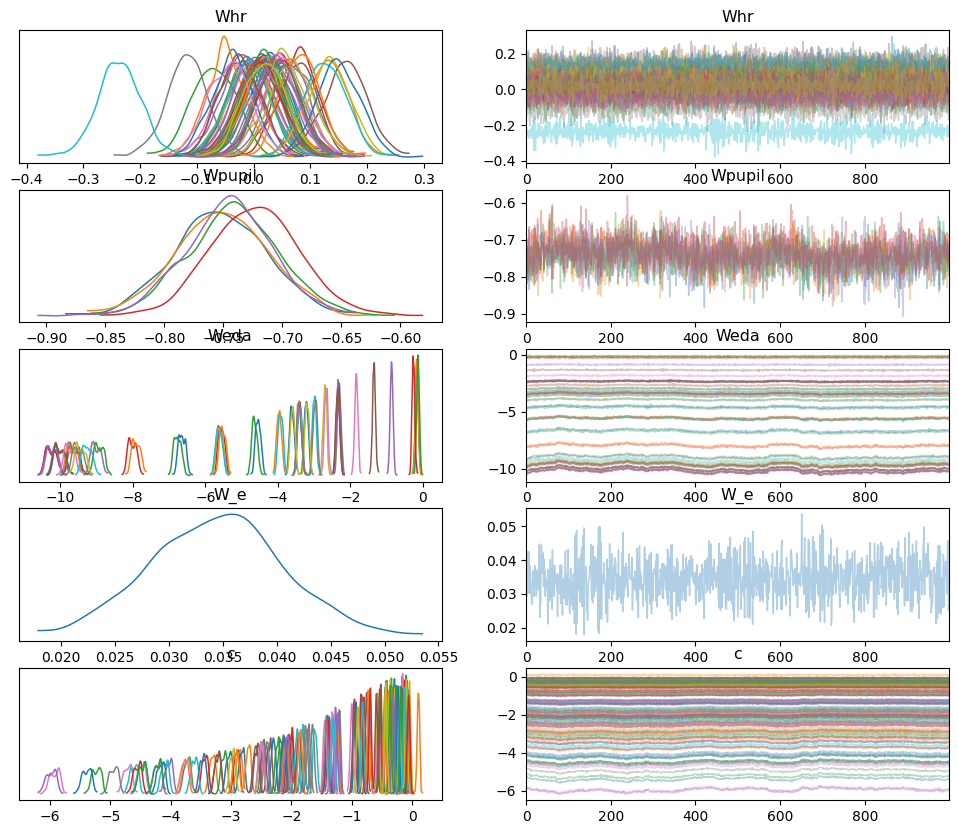

In [23]:
#az.plot_posterior(mean_field.sample(1000), color="LightSeaGreen")
az.plot_trace(trace)
plt.show()

In [24]:
with sPPCA:
    # update values of predictors:
    pm.set_data({"pupil_data": pupil,"hr_data":hr,"eda_data":eda})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)

Sampling: [x_e, x_eda, x_hr, x_pupil]


In [25]:
e_pred = posterior_predictive.posterior_predictive["x_e"]

In [26]:
e_pred

<xarray.DataArray 'x_e' (chain: 1, draw: 1000, x_e_dim_0: 1, x_e_dim_1: 160)>
array([[[[0, 1, 1, ..., 0, 1, 0]],

        [[0, 1, 1, ..., 0, 1, 1]],

        [[0, 0, 1, ..., 0, 0, 0]],

        ...,

        [[0, 1, 0, ..., 0, 1, 1]],

        [[0, 0, 0, ..., 1, 1, 0]],

        [[0, 0, 0, ..., 0, 1, 0]]]])
Coordinates:
  * chain      (chain) int64 0
  * draw       (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * x_e_dim_0  (x_e_dim_0) int64 0
  * x_e_dim_1  (x_e_dim_1) int64 0 1 2 3 4 5 6 7 ... 153 154 155 156 157 158 159

In [27]:
e_pred_mode = np.squeeze(stats.mode(e_pred[0], keepdims=False)[0])[:,np.newaxis]

In [28]:
e_pred_mode

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [29]:
e_labels

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [30]:
train_accuracy_exp = accuracy_score(e_labels, e_pred_mode)
print('\n\tTrain Accuracy Pain Expectation: ' + str(train_accuracy_exp))
print(' ')


	Train Accuracy Pain Expectation: 0.5375
 


--------------------------------------------------------------------------------------------

In [31]:
hr_pred_mean = (stats.median_abs_deviation(hr_pred[0]))[0]
hr_pred_mean

NameError: name 'hr_pred' is not defined

In [ ]:
hr[0]

In [ ]:
#hr_pred_mode= pd.Series([0.006,0.01,0.02,0.003])

hr and hr_pred_mode devono avere same shape

In [ ]:
train_accuracy_hr = (np.subtract(hr[0], hr_pred_mean))
print('\n\t avg distance hr: \n' + str(train_accuracy_hr))
#print(' ')

In [ ]:
with sPPCA:
    # update values of predictors:
    pm.set_data({"hr_data": hr})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)
    gaze_pred = posterior_predictive.posterior_predictive["x_gaze"]

In [ ]:
gaze_pred

In [ ]:
gaze_pred_mean = np.mean(gaze_pred, axis=0).T.reshape(-1)
gaze_true = pupil.reshape(-1)
reconstructed_r2 = metrics.r2_score(gaze_true, gaze_pred_mean)

print('\n\tReconstructed X R2 score: ' + str(reconstructed_r2))

In [ ]:
import deepemogp.feature_extractor as feature_extractor

In [ ]:
f = feature_extractor.FE('wavelet', window=(8,6), params={'w_mother':'db3','w_maxlev':1})

In [ ]:
x = [3, 7, 1, 1, -2, 5, 4, 6]

In [ ]:
f.apply(x)